In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'automotive_data.xlsx'

# Read the Excel file into DataFrames
automotive_data = pd.ExcelFile(file_path)
consultant_df = automotive_data.parse('consultant')
sales_df = automotive_data.parse('sales')

# Merge consultant and sales data on a common column (assuming 'consultant_id' is the key)
merged_df = pd.merge(sales_df, consultant_df, on='consultant_id', how='inner')

# 1. Top-Performing Consultants
top_consultants = (
    merged_df.groupby('name')['sale_price']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'total_revenue', 'count': 'total_sales'})
    .sort_values(by='total_revenue', ascending=False)
)
print("Top-Performing Consultants:")
print(top_consultants)

# 2. Average Sales per Consultant
average_sales = (
    merged_df.groupby('name')['sale_price']
    .mean()
    .rename('average_sale_amount')
    .sort_values(ascending=False)
)
print("\nAverage Sales per Consultant:")
print(average_sales)



Top-Performing Consultants:
                  total_revenue  total_sales
name                                        
Andrew Thomas        1951024.55           89
David Miller         1946801.50           85
Michael Williams     1841505.70           87
Sophia Moore         1826560.50           90
Sarah Jones          1799436.55           91
Daniel Wilson        1799007.50           88
Chris Davis          1788613.25           89
Emily Taylor         1740221.20           79
Alex Johnson         1706173.75           80
Matthew Anderson     1703005.75           89
John Smith           1568324.95           71
Jessica Brown        1258847.25           62

Average Sales per Consultant:
name
David Miller        22903.547059
John Smith          22089.083803
Emily Taylor        22028.116456
Andrew Thomas       21921.624157
Alex Johnson        21327.171875
Michael Williams    21166.732184
Daniel Wilson       20443.267045
Jessica Brown       20303.987903
Sophia Moore        20295.116667
Chris Dav

In [5]:
# Read the Excel file into DataFrames
automotive_data = pd.ExcelFile(file_path)
customers_df = automotive_data.parse('customers')
sales_df = automotive_data.parse('sales')

# Merge customers and sales data on a common column (assuming 'customer_id' is the key)
merged_df = pd.merge(sales_df, customers_df, on='customer_id', how='inner')


In [6]:
# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

# Group by age group and calculate average sale price and total purchases
segmentation = merged_df.groupby('age_group')['sale_price'].agg(['mean', 'count']).rename(
    columns={'mean': 'avg_sale_price', 'count': 'total_purchases'}
)
print("Customer Segmentation by Age Group:")
print(segmentation)


Customer Segmentation by Age Group:
           avg_sale_price  total_purchases
age_group                                 
<18          21838.455000               20
18-25        22680.950773              194
26-35        20817.677778              261
36-45        19918.804406              261
46-55        22678.281422              218
56-65        20319.191732              254
65+          19990.765789              114


/var/folders/z8/4pd0hcn95j18p09gptr8fftc0000gn/T/ipykernel_18127/2092346990.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation = merged_df.groupby('age_group')['sale_price'].agg(['mean', 'count']).rename(


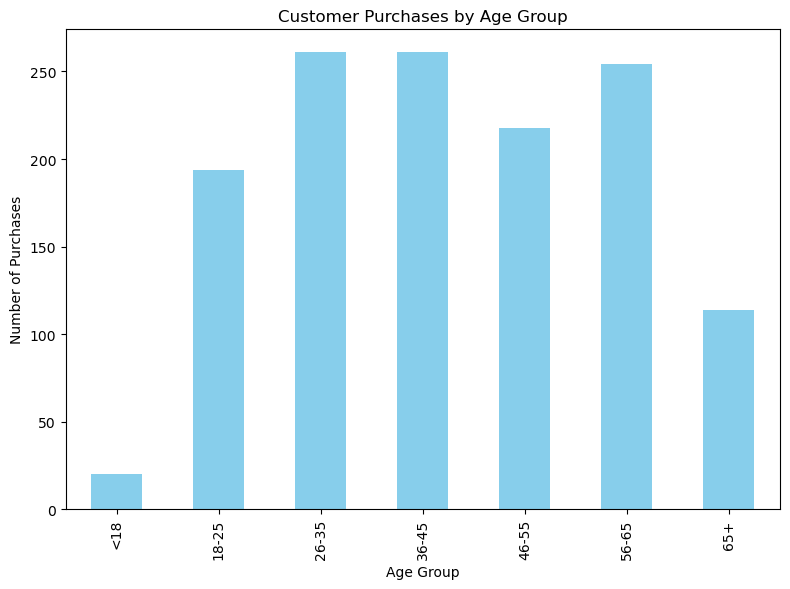

In [7]:
# Plot customer segmentation by age group
plt.figure(figsize=(8, 6))
segmentation['total_purchases'].plot(kind='bar', color='skyblue')
plt.title('Customer Purchases by Age Group')
plt.ylabel('Number of Purchases')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()


In [8]:
# Repeat vs. New Customers
customer_purchase_count = merged_df.groupby('customer_id')['sale_id'].count()
merged_df['customer_type'] = merged_df['customer_id'].apply(
    lambda x: 'Repeat' if customer_purchase_count[x] > 1 else 'New'
)

# Calculate repeat vs. new customers
customer_type_counts = merged_df['customer_type'].value_counts()
print("\nRepeat vs. New Customers:")
print(customer_type_counts)



Repeat vs. New Customers:
customer_type
New       710
Repeat    612
Name: count, dtype: int64


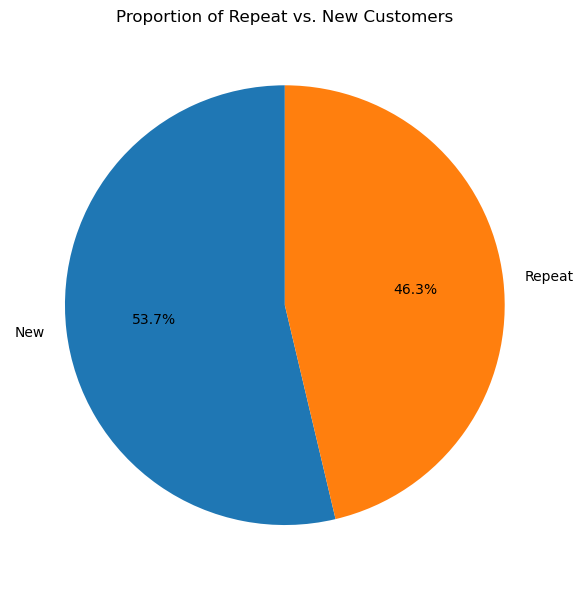

In [9]:
# Plot repeat vs. new customers
plt.figure(figsize=(6, 6))
customer_type_counts.plot(kind='pie', autopct='%1.1f%%', labels=customer_type_counts.index, startangle=90)
plt.title('Proportion of Repeat vs. New Customers')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [10]:
# Analyze make preferences
preferences = merged_df.groupby('make')['sale_price'].agg(['mean', 'count']).rename(
    columns={'mean': 'avg_sale_price', 'count': 'total_purchases'}
)
print("\nCustomer Preferences by Make:")
print(preferences)



Customer Preferences by Make:
               avg_sale_price  total_purchases
make                                          
Acura            25848.815972               72
Audi             21567.714516               62
BMW              19716.467857               70
Chevrolet        18867.162264               53
Dodge            20709.014493               69
Ford             16686.859231               65
Honda            13111.527465               71
Hyundai          15097.254839               62
Infiniti         38856.558442               77
Jeep             17590.989474               57
Kia              14280.167187               64
Lexus            21343.596023               88
Mazda            23313.035556               45
Mercedes-Benz    27946.675000               82
Nissan           16992.466393               61
Subaru           15648.288596               57
Tesla            38236.842105               57
Toyota           13672.253968               63
Volkswagen       14443.522078

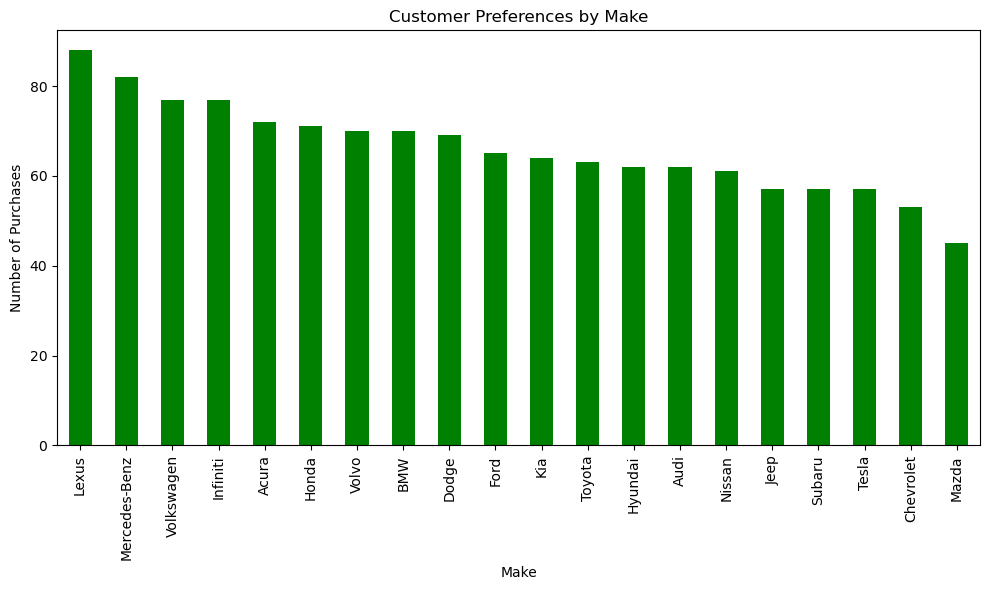

In [11]:
# Plot preferences by make
plt.figure(figsize=(10, 6))
preferences['total_purchases'].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Customer Preferences by Make')
plt.ylabel('Number of Purchases')
plt.xlabel('Make')
plt.tight_layout()
plt.show()


In [13]:
# Load the sales data
file_path = 'automotive_data.xlsx'  # Update with your file path if needed
data = pd.ExcelFile(file_path)
sales_data = data.parse('sales')

# Ensure 'sale_date' is in datetime format
sales_data['sale_date'] = pd.to_datetime(sales_data['sale_date'])

# Extract year and month from 'sale_date'
sales_data['year'] = sales_data['sale_date'].dt.year
sales_data['month'] = sales_data['sale_date'].dt.month

# Calculate total sales by year
sales_by_year = sales_data.groupby('year')['sale_price'].sum().reset_index()

# Calculate total sales by month across all years
sales_by_month = sales_data.groupby('month')['sale_price'].sum().reset_index()

# Display the results
print("Sales by Year:")
print(sales_by_year)

print("\nSales by Month:")
print(sales_by_month)

Sales by Year:
   year   sale_price
0  2014   4273935.10
1  2015   5533459.90
2  2016  11122127.45

Sales by Month:
    month  sale_price
0       1  1674163.20
1       2  1698447.40
2       3  1628221.05
3       4  2085090.20
4       5  1649546.10
5       6  1846759.65
6       7  1420795.90
7       8  1777821.45
8       9  1895015.35
9      10  1598385.80
10     11  1912203.60
11     12  1743072.75


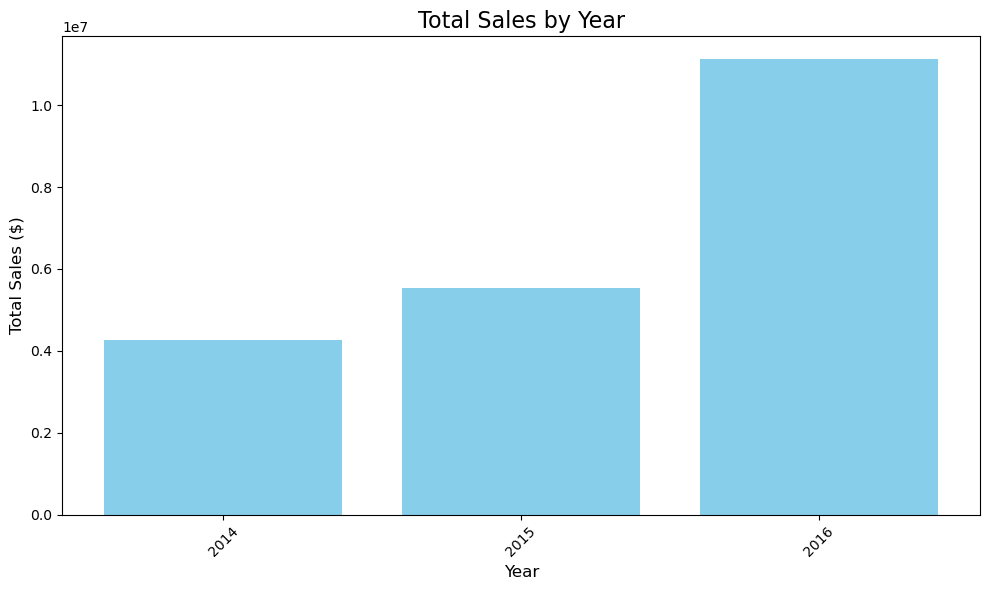

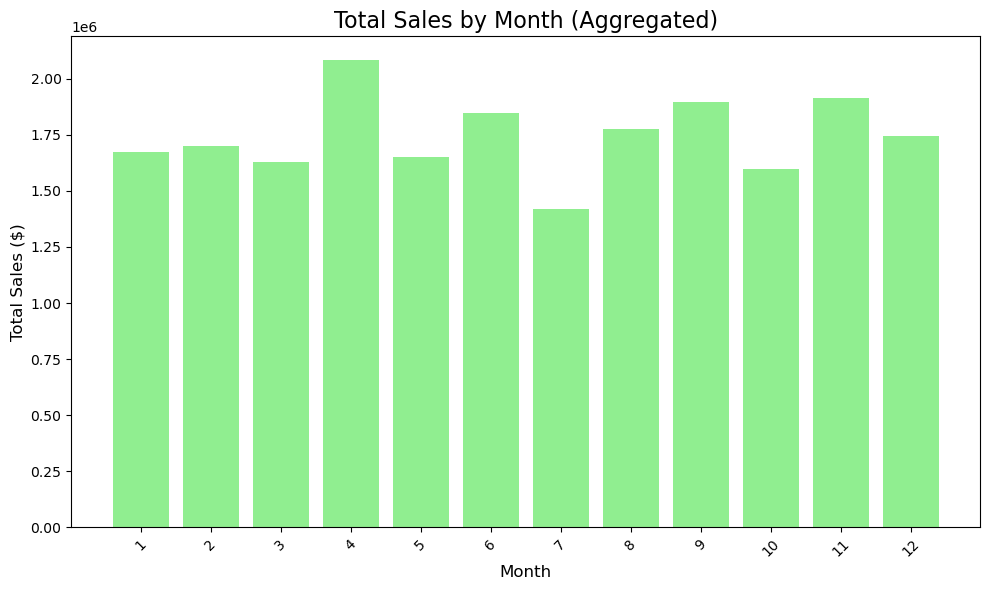

In [14]:
import matplotlib.pyplot as plt

# Plot sales by year
plt.figure(figsize=(10, 6))
plt.bar(sales_by_year['year'], sales_by_year['sale_price'], color='skyblue')
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(sales_by_year['year'], rotation=45)
plt.tight_layout()
plt.show()

# Plot sales by month
plt.figure(figsize=(10, 6))
plt.bar(sales_by_month['month'], sales_by_month['sale_price'], color='lightgreen')
plt.title('Total Sales by Month (Aggregated)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(sales_by_month['month'], rotation=45)
plt.tight_layout()
plt.show()


Revenue Trends Over Time:
year_month
1970-01    20929522.45
Freq: M, Name: sale_price, dtype: float64

Average Loan Amount and Interest Rates:
loan_amount      17955.919
interest_rate        7.390
dtype: float64

Vehicles with the Highest Financing Demand:
make
Volkswagen       58
Lexus            58
Infiniti         56
Mercedes-Benz    55
Acura            54
Kia              54
Volvo            54
Honda            52
Toyota           52
Dodge            51
Ford             50
BMW              50
Nissan           49
Audi             47
Tesla            46
Hyundai          45
Jeep             45
Chevrolet        45
Subaru           44
Mazda            35
Name: sale_id, dtype: int64


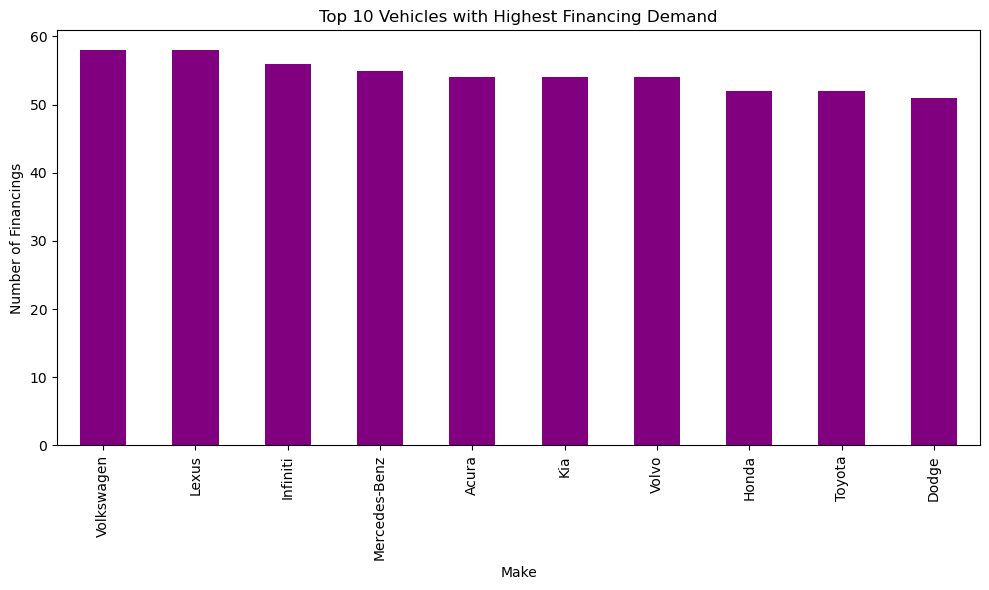

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'automotive_data.xlsx'

# Read the Excel file into DataFrames
automotive_data = pd.ExcelFile(file_path)
sales_df = automotive_data.parse('sales')
finance_df = automotive_data.parse('finance')

# Merge sales and finance data on a common column (assuming 'sale_id' is the key)
merged_df = pd.merge(sales_df, finance_df, on='sale_id', how='inner')

# Rename the correct sale_price column
merged_df.rename(columns={'sale_price_x': 'sale_price'}, inplace=True)

# 1. Revenue Trends Over Time
# Convert sale_date to datetime and extract year-month
merged_df['sale_date'] = pd.to_datetime(merged_df['sale_date'])
merged_df['year_month'] = merged_df['sale_date'].dt.to_period('M')

# Group by year_month and calculate total revenue
revenue_trends = merged_df.groupby('year_month')['sale_price'].sum()
print("Revenue Trends Over Time:")
print(revenue_trends)

# 2. Financing Trends: Average Loan Amount and Interest Rates
# Calculate average loan amount and interest rates
financing_trends = merged_df[['loan_amount', 'interest_rate']].mean()
print("\nAverage Loan Amount and Interest Rates:")
print(financing_trends)

# 3. Identifying Vehicles with the Highest Financing Demand
# Count the number of financings per vehicle
vehicle_financing_demand = merged_df.groupby('make')['sale_id'].count().sort_values(ascending=False)
print("\nVehicles with the Highest Financing Demand:")
print(vehicle_financing_demand)

# Plot vehicles with the highest financing demand
plt.figure(figsize=(10, 6))
vehicle_financing_demand.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Vehicles with Highest Financing Demand')
plt.ylabel('Number of Financings')
plt.xlabel('Make')
plt.tight_layout()
plt.show()


In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'automotive_data.xlsx'

# Read the Excel file into DataFrames
automotive_data = pd.ExcelFile(file_path)
sales_df = automotive_data.parse('sales')
finance_df = automotive_data.parse('finance')

# Merge sales and finance data on a common column (assuming 'sale_id' is the key)
merged_df = pd.merge(sales_df, finance_df, on='sale_id', how='inner')

# Rename the correct sale_price column
merged_df.rename(columns={'sale_price_x': 'sale_price'}, inplace=True)


In [72]:
# Convert sale_date to datetime and extract year, month, and quarter
merged_df['sale_date'] = pd.to_datetime(merged_df['sale_date'])
merged_df['year'] = merged_df['sale_date'].dt.year
merged_df['month'] = merged_df['sale_date'].dt.month
merged_df['quarter'] = merged_df['sale_date'].dt.quarter

# Group by year-month and calculate total sales
monthly_sales = merged_df.groupby(merged_df['sale_date'].dt.to_period('M'))['sale_price'].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)




Monthly Sales Trends:
sale_date
1970-01    20929522.45
Freq: M, Name: sale_price, dtype: float64


In [73]:
# Group by year and calculate total sales
yearly_sales = merged_df.groupby('year')['sale_price'].sum()
print("\nYearly Sales Trends:")
print(yearly_sales)



Yearly Sales Trends:
year
1970    20929522.45
Name: sale_price, dtype: float64



Best-Selling Brands:
make
Infiniti         2111251.00
Tesla            1728342.00
Mercedes-Benz    1591015.25
Acura            1423782.45
Volvo            1272289.15
Lexus            1224953.55
Dodge            1090475.35
Audi             1050061.40
BMW               924551.90
Nissan            871697.95
Chevrolet         833579.35
Ford              830393.10
Jeep              799870.30
Volkswagen        797609.05
Mazda             797497.05
Kia               796692.65
Honda             725918.95
Hyundai           722642.40
Toyota            692905.75
Subaru            643993.85
Name: sale_price, dtype: float64


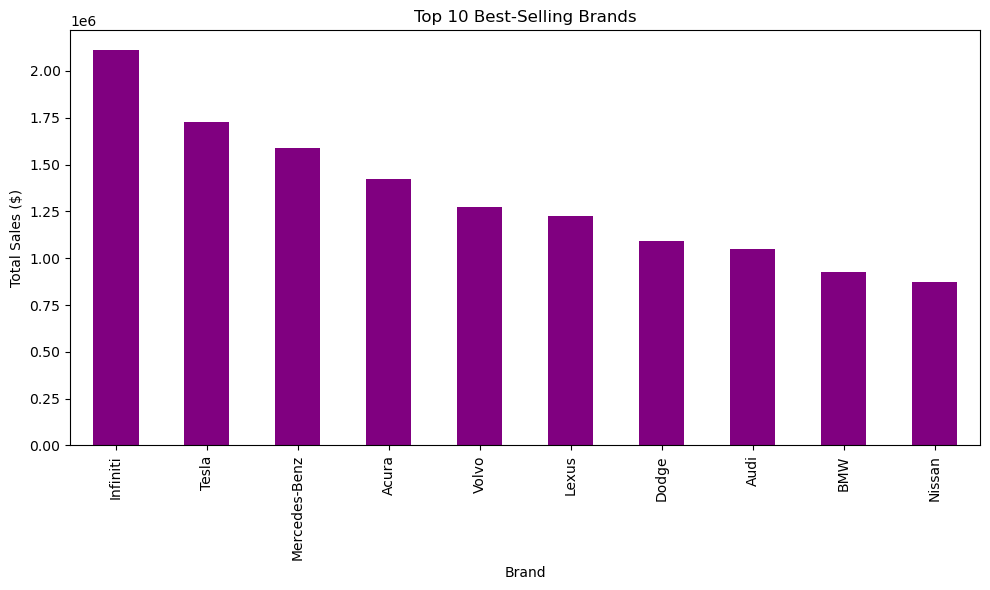

In [74]:
# Analyze best-selling makes
best_selling_brands = merged_df.groupby('make')['sale_price'].sum().sort_values(ascending=False)
print("\nBest-Selling Brands:")
print(best_selling_brands)

# Plot top 10 best-selling brands
plt.figure(figsize=(10, 6))
best_selling_brands.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Best-Selling Brands')
plt.ylabel('Total Sales ($)')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()



Best-Selling Models:
model
Model 3     1016071.00
GLE          675252.00
QX60         641476.00
QX70         619225.00
Q50          536301.00
               ...    
Corolla      117286.25
Accord       115404.60
Mazda3       101359.80
Outback       89999.00
Santa Fe      68679.05
Name: sale_price, Length: 79, dtype: float64


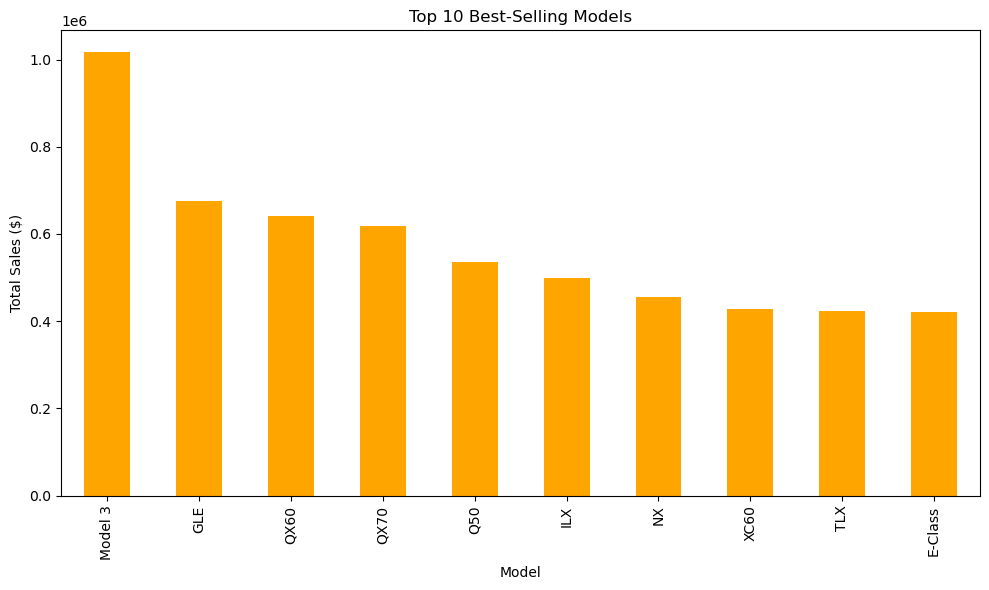

In [75]:
# Analyze best-selling models
best_selling_models = merged_df.groupby('model')['sale_price'].sum().sort_values(ascending=False)
print("\nBest-Selling Models:")
print(best_selling_models)

# Plot top 10 best-selling models
plt.figure(figsize=(10, 6))
best_selling_models.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Best-Selling Models')
plt.ylabel('Total Sales ($)')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


In [76]:
# Analyze correlation between sale price and loan amount
correlation = merged_df[['sale_price', 'loan_amount']].corr()
print("\nCorrelation Between Sale Price and Loan Amount:")
print(correlation)



Correlation Between Sale Price and Loan Amount:
             sale_price  loan_amount
sale_price      1.00000      0.64971
loan_amount     0.64971      1.00000


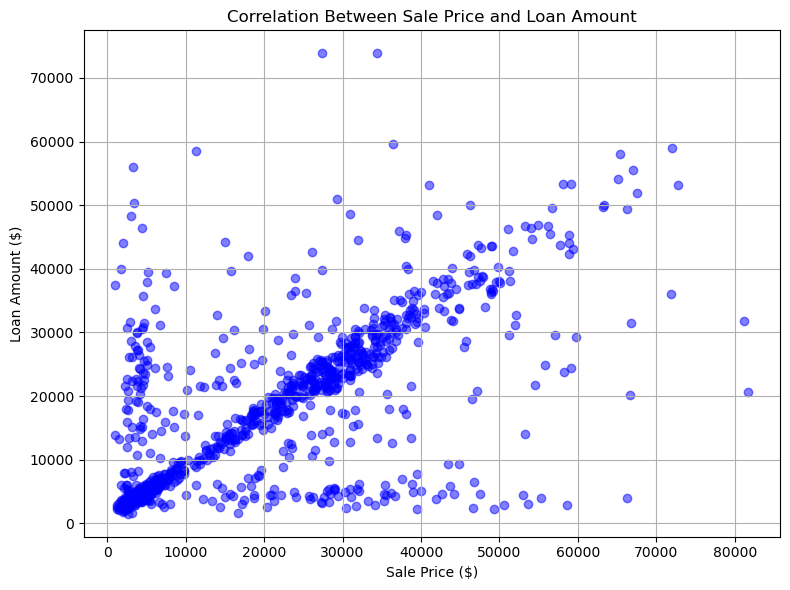

In [77]:
# Check for valid data ranges before plotting scatter plot
if merged_df['sale_price'].nunique() > 1 and merged_df['loan_amount'].nunique() > 1:
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_df['sale_price'], merged_df['loan_amount'], alpha=0.5, color='blue')
    plt.title('Correlation Between Sale Price and Loan Amount')
    plt.xlabel('Sale Price ($)')
    plt.ylabel('Loan Amount ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient variation in sale_price or loan_amount for scatter plot.")


/var/folders/z8/4pd0hcn95j18p09gptr8fftc0000gn/T/ipykernel_18127/2584695672.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.groupby(pd.Grouper(key='sale_date', freq='M'))['sale_price'].sum()
/var/folders/z8/4pd0hcn95j18p09gptr8fftc0000gn/T/ipykernel_18127/2584695672.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_2017 = pd.date_range(start='2017-01-01', periods=12, freq='M')


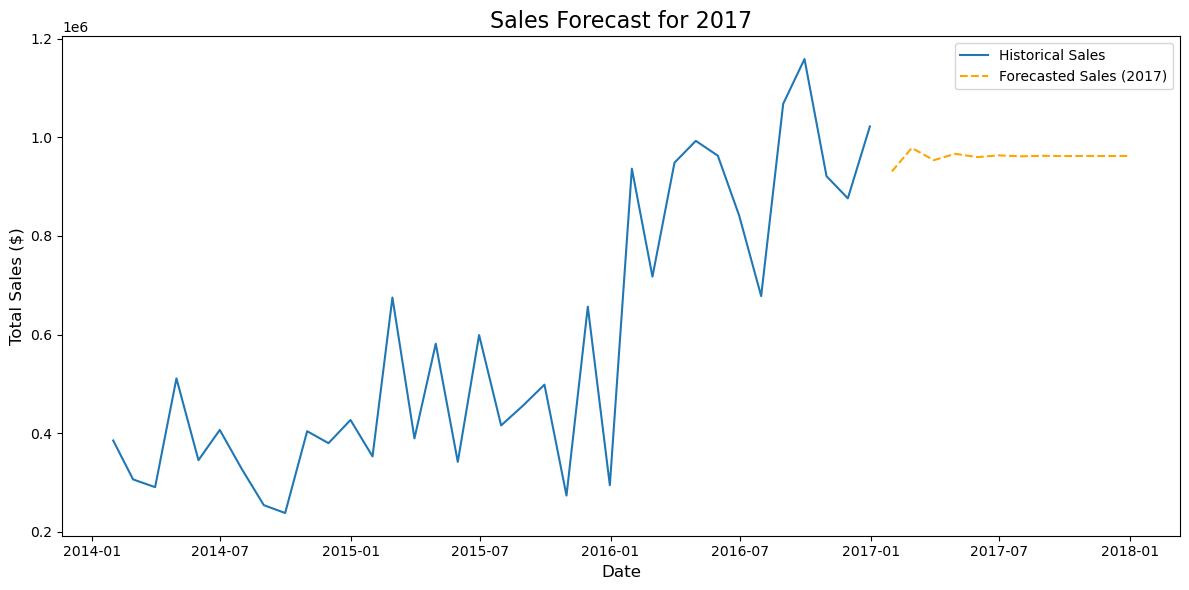

2017-01-31    930776.416911
2017-02-28    978355.910254
2017-03-31    953523.168557
2017-04-30    966483.900520
2017-05-31    959719.420985
2017-06-30    963249.945612
2017-07-31    961407.290301
2017-08-31    962369.010995
2017-09-30    961867.068669
2017-10-31    962129.042962
2017-11-30    961992.313050
2017-12-31    962063.675277
Freq: ME, Name: predicted_mean, dtype: float64


In [15]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate sales data by month for time series forecasting
monthly_sales = sales_data.groupby(pd.Grouper(key='sale_date', freq='M'))['sale_price'].sum()

# Fit an ARIMA model (p, d, q parameters can be fine-tuned as needed)
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast sales for 12 months (2017 only)
forecast_2017 = model_fit.forecast(steps=12)
forecast_index_2017 = pd.date_range(start='2017-01-01', periods=12, freq='M')
forecast_series_2017 = pd.Series(forecast_2017, index=forecast_index_2017)

# Plot historical sales and forecasted sales for 2017
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_series_2017, label='Forecasted Sales (2017)', linestyle='--', color='orange')
plt.title('Sales Forecast for 2017', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Display forecasted sales
print(forecast_series_2017)
